Especialização em Inteligência Artificial<br>
Lista de Exercícios 02<br>
Análise e Previsão de Séries Temporais<br>

In [84]:
# Importando das bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
import locale
from random import gauss, randrange, random
import statsmodels.tsa.api as smt

rcParams['figure.figsize'] = 15, 6
locale.setlocale(locale.LC_ALL, '')
formato = "%d-%m-%Y"

1.	A série ilustrada abaixo, feita pelo IBGE, demonstra o volume de vendas mensal no Brasil. Ela está disponível no arquivo vendas_brasil.csv, em anexo a esta atividade, e também pode ser obtida em diferentes formatos no endereço: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=series-historicas

In [75]:
# Carregando os dados da série temporal.

vendas_brasil = pd.read_csv('datasets/vendas_brasil.csv')

# Formatando a data

vendas_brasil['Mês'] = vendas_brasil['Mês'].apply(lambda linha: datetime.strptime(linha, formato))

# Criando a série temporal

vendas_brasil_series = pd.Series(vendas_brasil['Brasil'].values, index=vendas_brasil['Mês'])
vendas_brasil_series.head()

Mês
2000-01-01    46.56262
2000-02-01    47.08777
2000-03-01    49.10081
2000-04-01    49.10081
2000-05-01    51.11386
dtype: float64

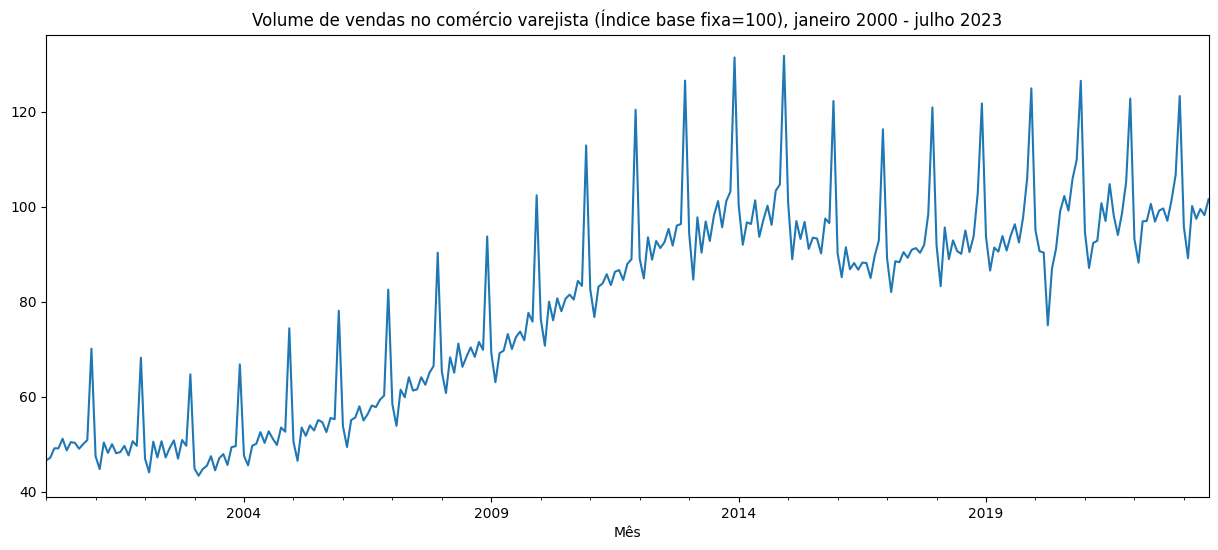

In [77]:
# Exibindo graficamente a série.

vendas_brasil_series.plot(title='Volume de vendas no comércio varejista (Índice base fixa=100), janeiro 2000 - julho 2023')
plt.show()

Realize uma análise e decomposição da série a partir dos passos definidos em a e b.

a. Roteiro 1:
1. Estimar tendência através de ajuste exponencial
2. Eliminar a tendência estimada
3. Estimar a sazonalidade através de médias móveis
4. Eliminar a sazonalidade
5. Analisar o resíduo para verificar se pertence a uma distribuição iid.

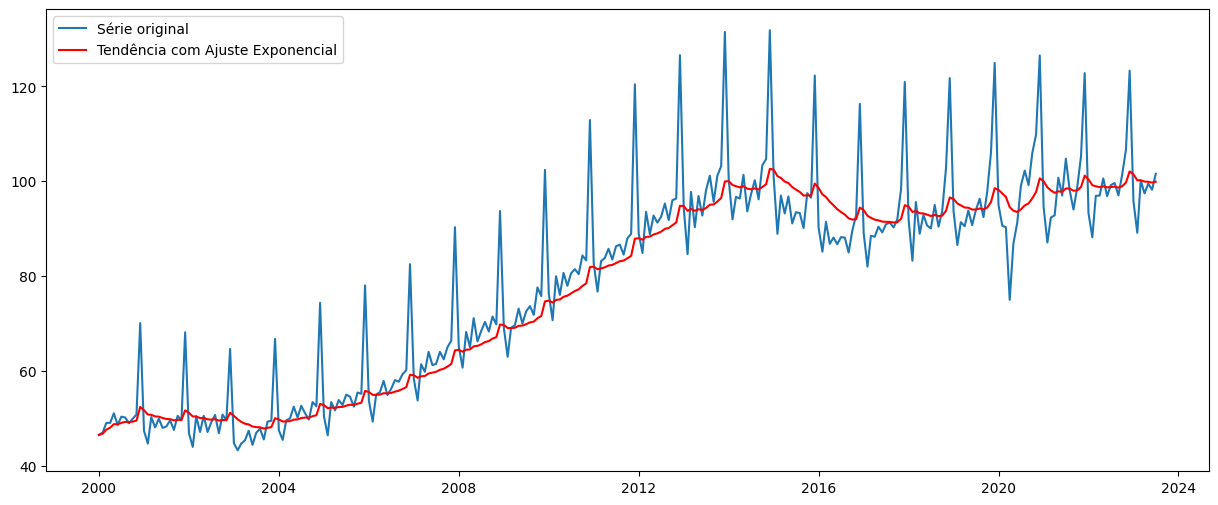

In [64]:
# 1. Estimando a tendência através de ajuste exponencial

exp_smooth =  vendas_brasil_series.ewm(alpha=0.1)
rolling_mean = exp_smooth.mean() # Tendência!!!
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(rolling_mean,color='red', label='Tendência com Ajuste Exponencial')
plt.legend(loc='best')
plt.show()

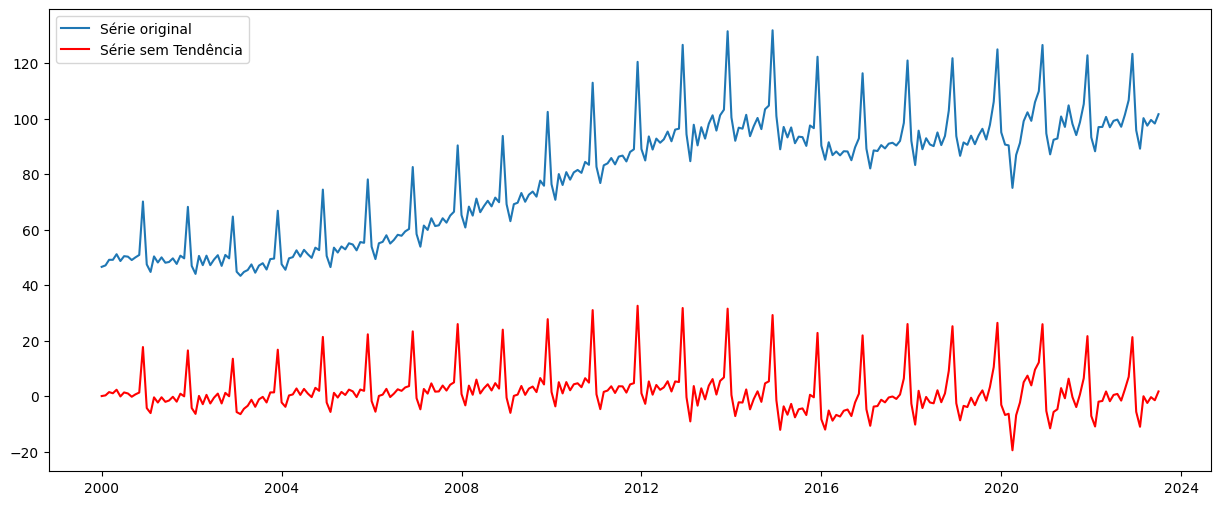

In [79]:
# 2. Eliminando a tendência estimada

sazonalidade_ruido = vendas_brasil_series - rolling_mean
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.legend(loc='best')
plt.show()

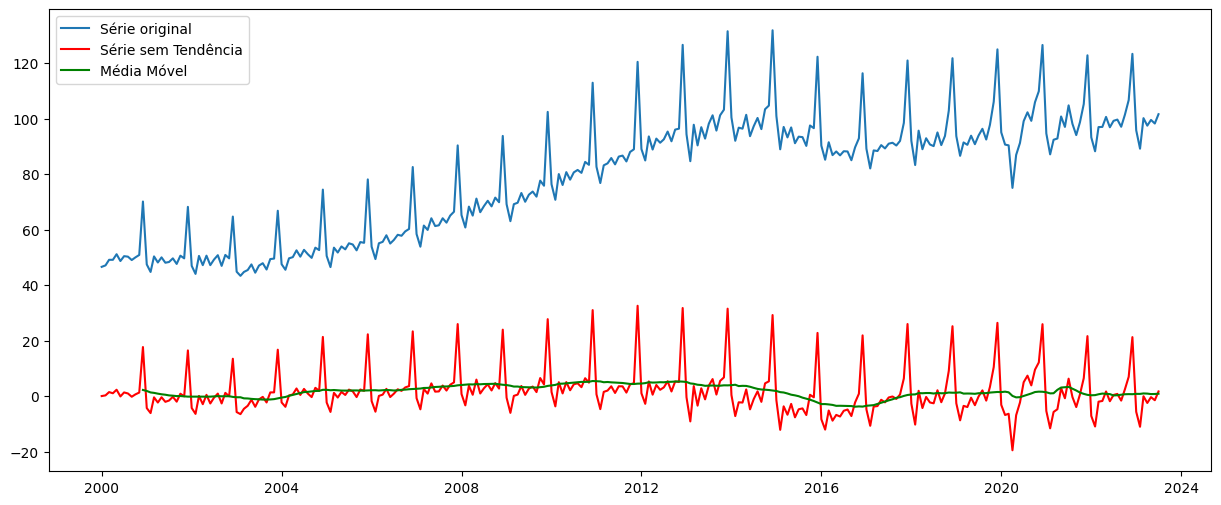

In [80]:
# 3. Estimando a Sazonalidade através de médias móveis

media_movel = sazonalidade_ruido.rolling(window=12).mean()

plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.plot(media_movel, color='green', label='Média Móvel')
plt.legend(loc='best')
plt.show()

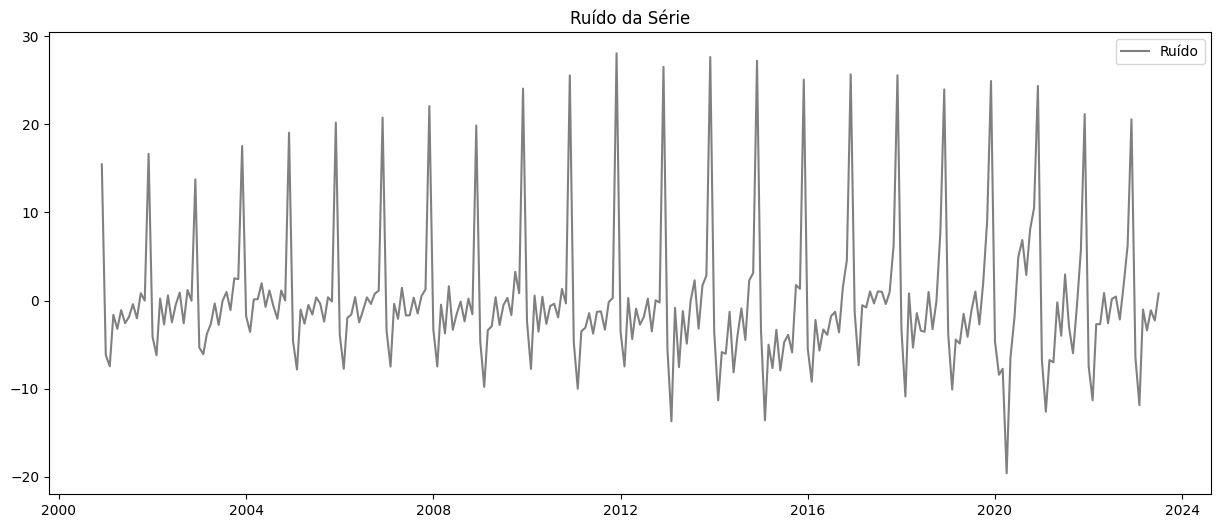

In [103]:
# 4. Eliminando a Sazonalidade

ruido = sazonalidade_ruido - media_movel

plt.plot(ruido, label='Ruído', color='grey')
plt.title('Ruído da Série')
plt.legend(loc='best')
plt.show()

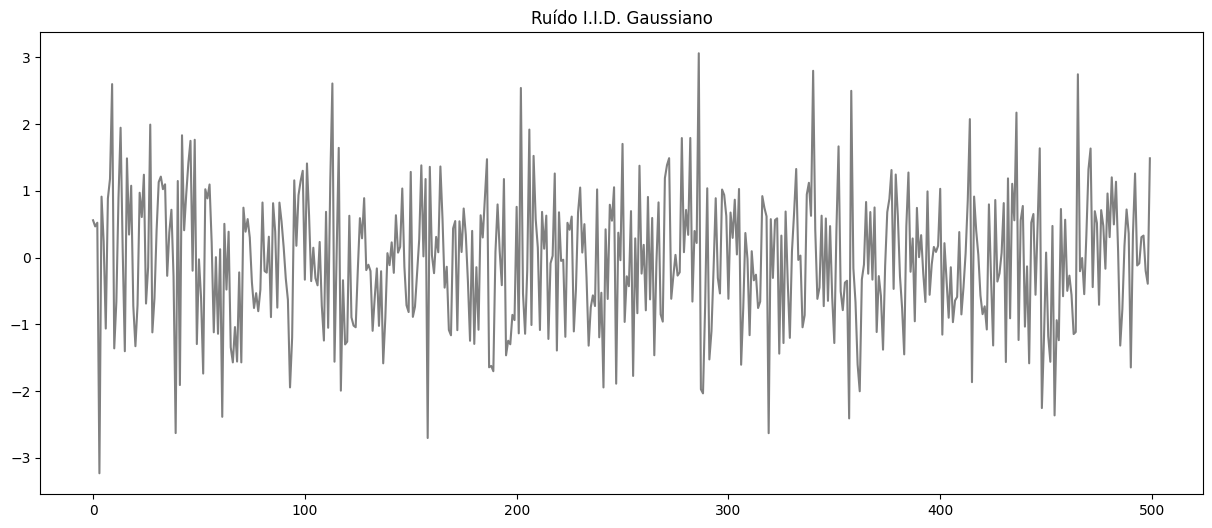

In [99]:
# 5. Analisando o resíduo para verificar se pertence a uma distribuição I.I.D.

# Série gerada por Ruído I.I.D Gaussiano
dados_iid = [gauss(0.0, 1.0) for i in range(500)]
serie_iid = pd.Series(dados_iid)
serie_iid.plot(title='Ruído I.I.D. Gaussiano', color='grey')
plt.show()

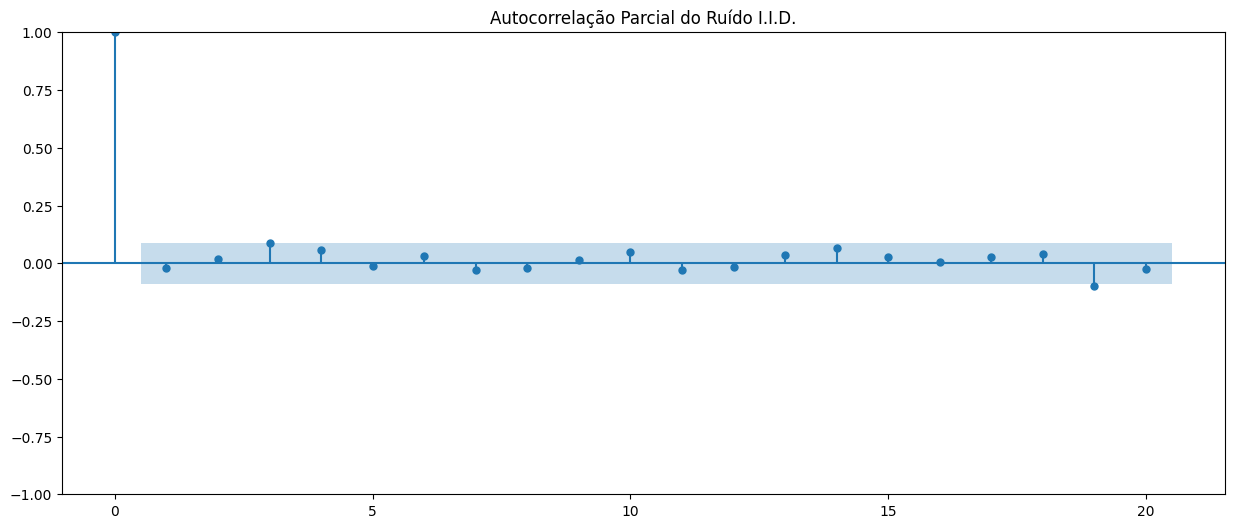

In [93]:
# Gerando o correlograma do ruído I.I.D.
 
smt.graphics.plot_pacf(serie_iid, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído I.I.D.")
plt.show()

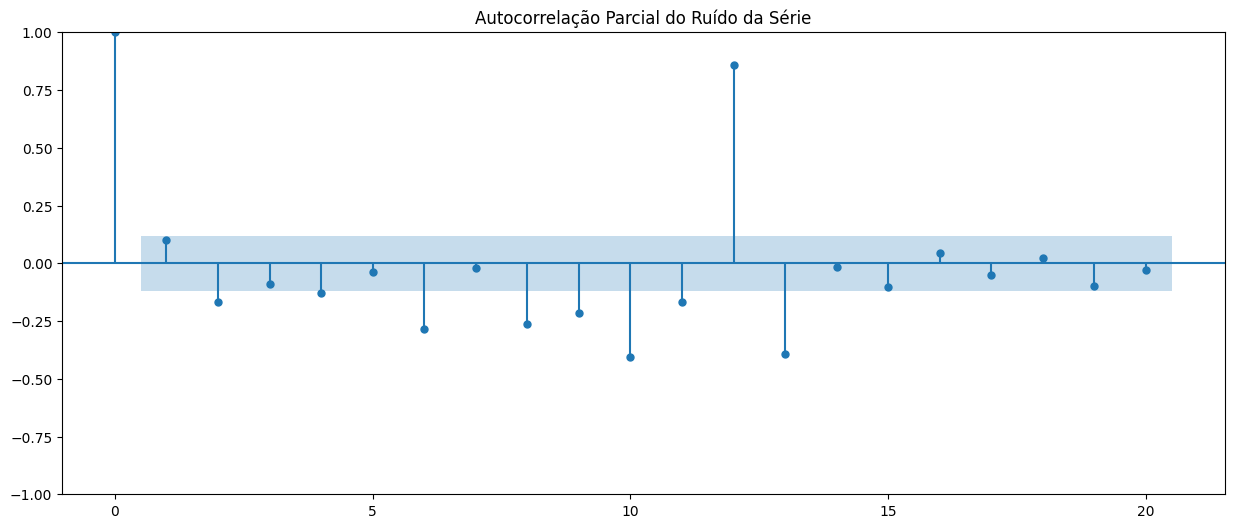

In [91]:
# Gerando o correlograma do ruído da série temporal em análise

ruido.dropna(inplace=True)
smt.graphics.plot_pacf(ruido, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído da Série")
plt.show()

*Nota*: Como muitos pontos de autocorrelação do ruído da série estão fora da zona em destaque (margem de 5%), não é possível afirmar que os dados do ruído da série têm uma distribuição I.I.D.

b. Roteiro 2:
1. Eliminar a tendência através de diferenciação
2. Eliminar a sazaonalidade através de diferenciação
3. Analisar o resíduo para verificar se pertence a uma distribuição iid.

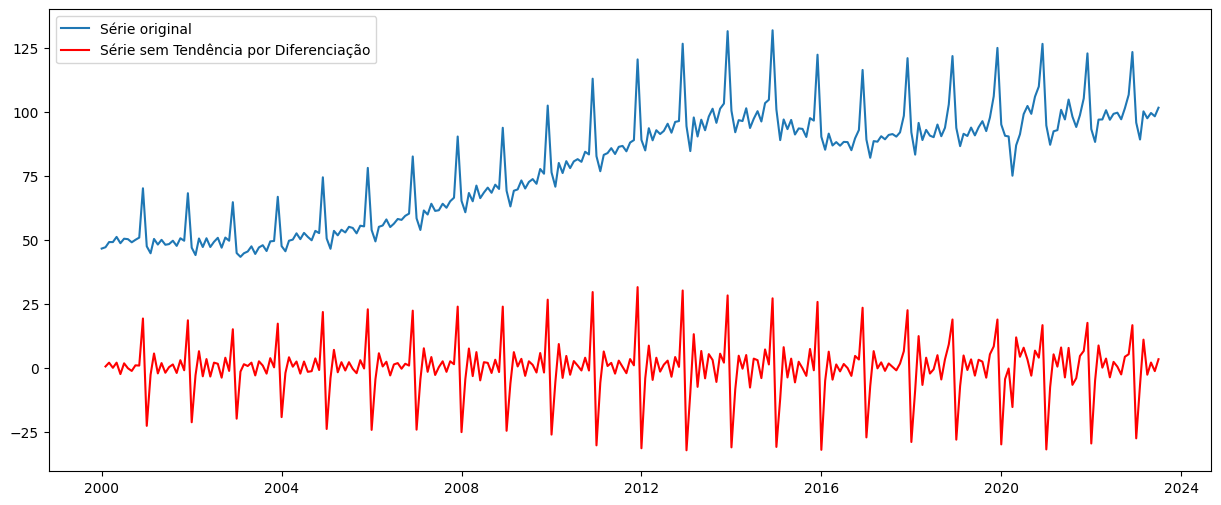

In [95]:
# 1. Eliminando a tendência através de diferenciação

vendas_ruido_sazonalidade = vendas_brasil_series - vendas_brasil_series.shift()
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(vendas_ruido_sazonalidade,color='red', label='Série sem Tendência por Diferenciação')
plt.legend(loc='best')
plt.show()

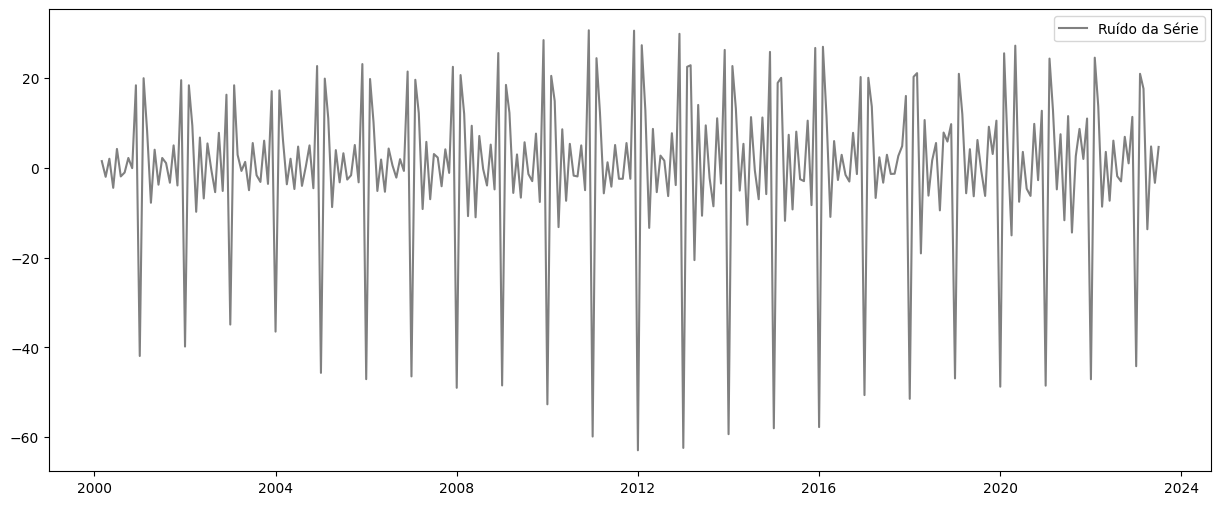

In [104]:
# 1. Eliminando a sazonalidade através de diferenciação

vendas_ruido = vendas_ruido_sazonalidade - vendas_ruido_sazonalidade.shift()
plt.plot(vendas_ruido, label='Ruído da Série', color='grey')
plt.legend(loc='best')
plt.show()

A partir da análise das séries decompostas, avalie se algum dos modelos é adequado para representar a série.

2. Utilize novamente a série **vendas_brasil** para testar um mecanismo de previsão. Trata-se de um mecanismo mais simplificado, que terá como base a tendência estimada por uma regressão linear.

Realize os seguintes passos:
1. Estime a tendência utilizando regressão linear. Em Python, utilize a função fit() do módulo Linear Regression (http://www.statsmodels.org/stable/regression.html);
2. Estime a tendeência com o valor estimado pela regressão linear;
3. Estime a sazonalidade através das médias móveis;
4. Elimine a sazonalidade;
5. Utilize a função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série;
6. Adicione a tendência estimada à sazonalidade;
7. Adicione ao resultado um ruído de média zero;
8. Compare em um mesmo gráfico a série original e a série prevista.